In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
train=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/LogisticRegression/titanic_train.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [7]:
train.isnull().sum()*100/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

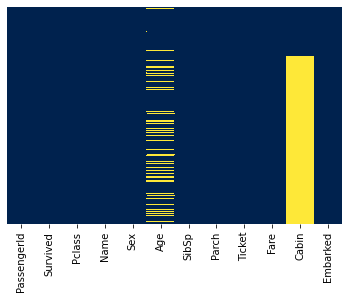

In [8]:
sns.heatmap(train.isnull().sort_values(by='Cabin'), yticklabels=False, cbar=False, cmap='cividis')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


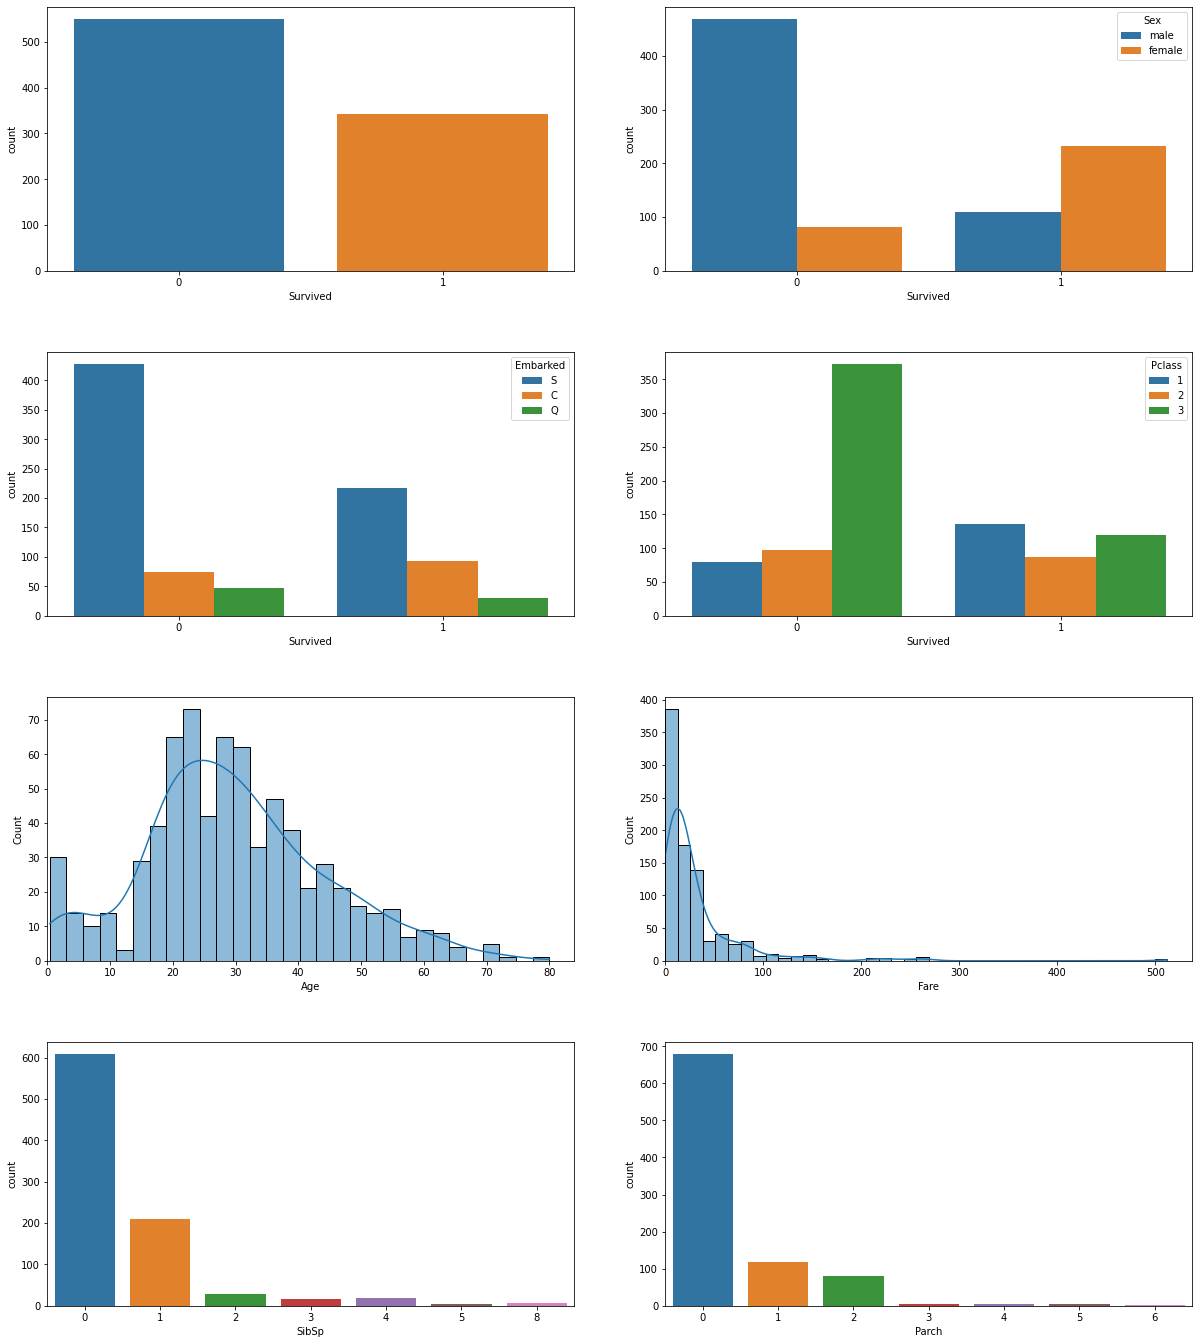

In [24]:
fig, axs = plt.subplots(nrows=4,ncols=2, figsize=(18,20))
fig.tight_layout(pad=6.0)
sns.countplot(x='Survived', data=train, ax=axs[0][0])
sns.countplot(x='Survived', data=train, hue='Sex', ax=axs[0][1])
sns.countplot(x='Survived', data=train, hue='Embarked', ax=axs[1][0])
sns.countplot(x='Survived', data=train, hue='Pclass', ax=axs[1][1])
sns.histplot(train['Age'], kde=True, ax=axs[2][0], bins=30).set(xlim=0)
sns.histplot(train['Fare'], kde=True, ax=axs[2][1], bins=40).set(xlim=0)
sns.countplot(x='SibSp', data=train, ax=axs[3][0])
sns.countplot(x='Parch', data=train, ax=axs[3][1])

In [25]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist', bins=40)

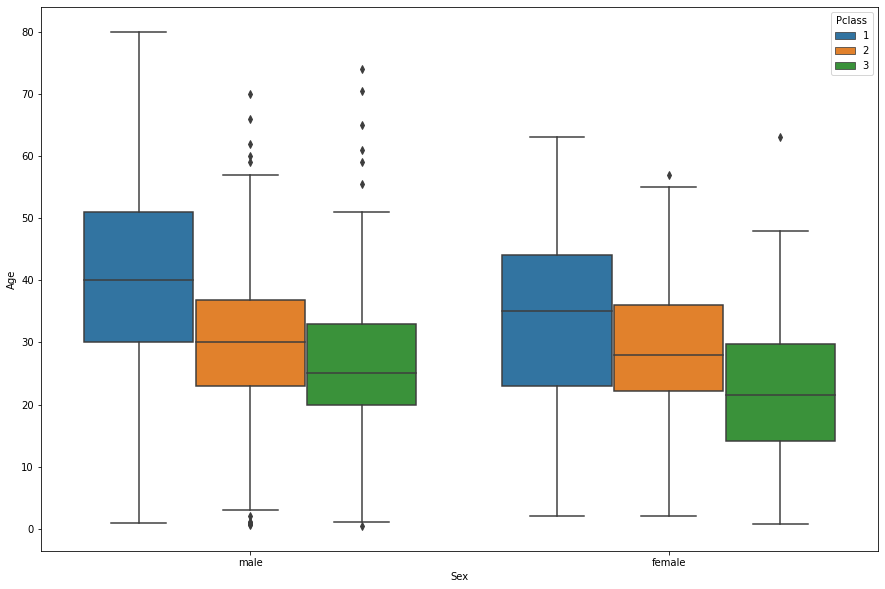

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex', y='Age', hue='Pclass', data=train)

In [ ]:
#Calculate Mean and use it to replace empty Age
mean_age=train[['Sex', 'Pclass', 'Age']].groupby(['Sex', 'Pclass']).mean()

#Use this method or the below method (any one)
#This method applies a function to change each value
def impute_age(cols):
    if not np.isnan(cols['Age']):
        return cols['Age']
    else:
        return round(mean_age.query(f'Sex=="{cols[0]}" and Pclass=={cols[1]}')['Age'][0])
train['Age']=train[['Sex', 'Pclass', 'Age']].apply(impute_age, axis=1)

#This method joins two data sets and use coalesce like operation to set the value.
impute_age=pd.merge(left=train,right=mean_age, how='inner', on=['Sex', 'Pclass'])[['Age_x','Age_y']]
train['Age']=round(impute_age['Age_x'].combine_first(impute_age['Age_y']))
del(impute_age); del(mean_age)

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [ ]:
train.isnull().sum()*100/len(train)

In [ ]:
train.dropna(inplace=True)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [ ]:
train['Sex']=pd.get_dummies(train['Sex'],drop_first=True)

embark=pd.get_dummies(train['Embarked'],prefix='embark',drop_first=True)
train=pd.concat([train,embark],axis=1).drop(['Name', 'Ticket', 'Embarked'], axis=1)
del(embark)

In [ ]:
train.drop('PassengerId', axis=1, inplace=True)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embark_Q,embark_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,22.0,1,0,71.2833,0,0
2,1,3,0,27.0,0,0,7.9250,0,1
3,1,1,0,9.0,1,0,53.1000,0,1
4,0,3,1,34.0,0,0,8.0500,0,1
5,0,3,1,25.0,0,0,8.4583,1,0
6,0,1,1,58.0,0,0,51.8625,0,1
7,0,3,1,22.0,3,1,21.0750,0,1
8,1,3,0,5.0,0,2,11.1333,0,1
9,1,2,0,23.0,1,0,30.0708,0,0
